In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('tmdb_5000_movies.csv')

In [2]:
data.describe()


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [3]:
print('%.3f' % data['vote_average'].mean())
print('%.3f' % data['vote_average'].var())
print('%.3f' % data['vote_average'].std())
print(data['vote_average'].median())
print(data['vote_average'].mode())
print(data['vote_average'].max())
print(data['vote_average'].min())
print(data['vote_average'].quantile(0.1))
print(data['vote_average'].quantile(0.25))
print(data['vote_average'].quantile(0.5))
print(data['vote_average'].quantile(0.75))

6.092
1.427
1.195
6.2
0    6.0
1    6.5
dtype: float64
10.0
0.0
4.9
5.6
6.2
6.8


In [4]:
data.dtypes


budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

Numerical features: 
            budget popularity revenue runtime vote_average vote_count


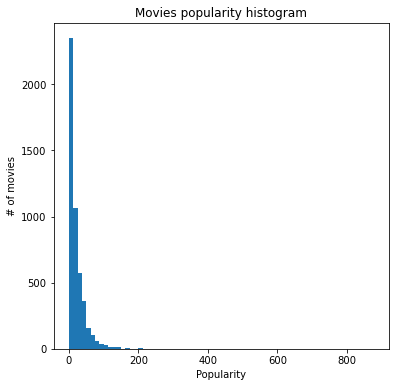

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.hist(data['popularity'],bins=70)
plt.title('Movies popularity histogram')
plt.xlabel('Popularity')
plt.ylabel('# of movies')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


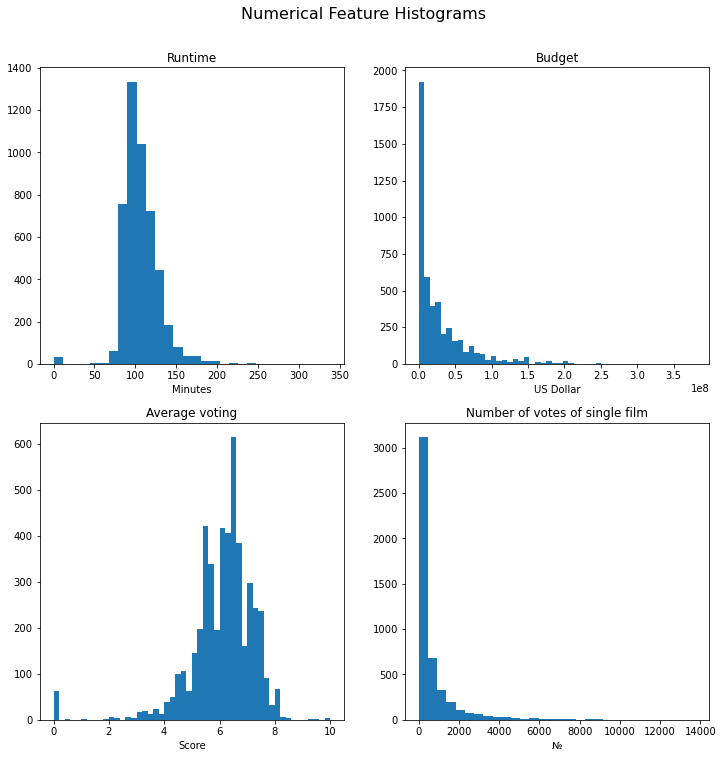

In [6]:
#числовые поля - продолжительность, бюджет, оценка зрителей, количество оценок

plt.rcParams['figure.figsize'] = 12, 12
fig, axs = plt.subplots(2,2)
fig.suptitle('Numerical Feature Histograms',y=0.95,fontsize=16)

axs[0,0].hist(data['runtime'],bins = 30)
axs[0,0].set_title('Runtime')
axs[0,0].set(xlabel='Minutes')

axs[0,1].hist(data['budget'], bins = 50)
axs[0,1].set_title('Budget')
axs[0,1].set(xlabel = 'US Dollar')

axs[1,0].hist(data['vote_average'], bins = 50)
axs[1,0].set_title('Average voting')
axs[1,0].set(xlabel = 'Score')

axs[1,1].hist(data['vote_count'], bins = 30)
axs[1,1].set_title('Number of votes of single film')
axs[1,1].set(xlabel = "№")

plt.show()

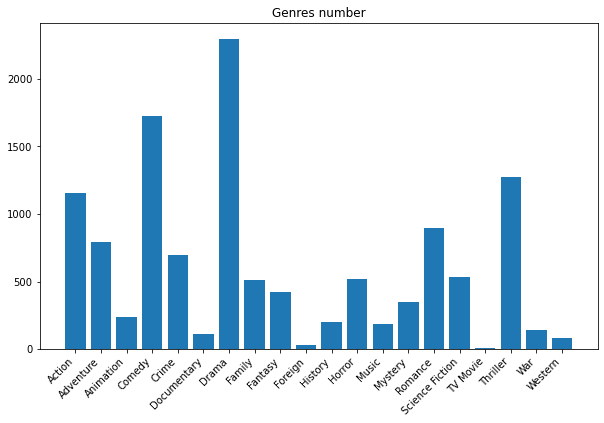

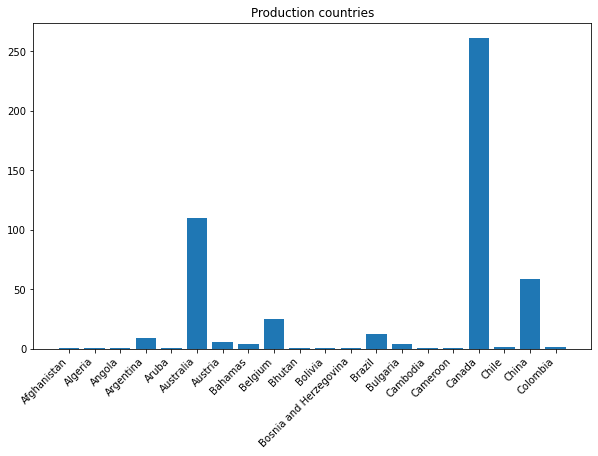

In [7]:
import json

# Нечисловые поля - количество по жарнам и странам

def dic_count(dataset, field):
    dic = {}
    for el in dataset[field].values:
        test = json.loads(el)
        for key in test:
            if dic.get(key["name"]) is None:
                dic[key["name"]] = 1
            else:
                dic[key["name"]] = dic[key["name"]] + 1
    return dic


# 1
genres = dic_count(data, "genres")
sort_genres = dict(sorted(genres.items()))

fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
ax.bar(list(sort_genres.keys()), list(sort_genres.values()))
ax.set_title('Genres number')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2
countries = dic_count(data, "production_countries")
sort_countries = dict(sorted(countries.items())[:20])

fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
ax.bar(list(sort_countries.keys()), list(sort_countries.values()))
ax.set_title('Production countries')
plt.xticks(rotation=45, ha='right')
plt.show()


In [8]:
#функции для вычислений рейтинга фильмов

def calculate_rating_medium(film_score, film_amount):
    if film_score == 0 or film_amount == 0:
        return 0
    v = film_amount
    m= data['vote_count'].quantile(0.75)
    R = film_score
    C = data['vote_average'].mean()
    return (v*R/(v+m))+(m*C/(v+m))

def calculate_rating_mediana(film_score, film_amount):
    if film_score == 0 or film_amount == 0:
        return 0
    v = film_amount
    m= data['vote_count'].quantile(0.75)
    R = film_score
    C = data['vote_average'].median()
    return (v*R/(v+m))+(m*C/(v+m))

def transform1(film):
    return {
        "name": film["title"],
        "score": calculate_rating_medium(film["vote_average"], film["vote_count"])
        }

def transform2(film):
    return {
        "name": film["title"],
        "score": calculate_rating_mediana(film["vote_average"], film["vote_count"])
        }

In [9]:
# рейтинг Топ-10 с С = среднее

marks = []

for i in range(len(data)):
    res = transform1(data.loc[i])
    if res["score"] is not None:
        marks.append(res)

marks = sorted(marks, key=lambda film: film["score"])
marks.reverse()

for i in range(10):
    print("{}. NAME: '{}' SCORE: {}\n".format(i+1, marks[i]["name"],'%.3f' % marks[i]["score"]))

1. NAME: 'The Shawshank Redemption' SCORE: 8.302

2. NAME: 'The Godfather' SCORE: 8.143

3. NAME: 'Fight Club' SCORE: 8.140

4. NAME: 'Pulp Fiction' SCORE: 8.122

5. NAME: 'The Dark Knight' SCORE: 8.078

6. NAME: 'Forrest Gump' SCORE: 8.021

7. NAME: 'Inception' SCORE: 7.998

8. NAME: 'Schindler's List' SCORE: 7.979

9. NAME: 'Whiplash' SCORE: 7.974

10. NAME: 'Interstellar' SCORE: 7.972



In [10]:
# рейтинг Топ-10 с С = медиана

marks = []

for i in range(len(data)):
    res = transform2(data.loc[i])
    if res["score"] is not None:
        marks.append(res)

marks = sorted(marks, key=lambda film: film["score"])
marks.reverse()

for i in range(10):
    print("{}. Film: '{}' SCORE: {}\n".format(i+1, marks[i]["name"],'%.3f' % marks[i]["score"]))

1. Film: 'The Shawshank Redemption' SCORE: 8.310

2. Film: 'The Godfather' SCORE: 8.155

3. Film: 'Fight Club' SCORE: 8.148

4. Film: 'Pulp Fiction' SCORE: 8.131

5. Film: 'The Dark Knight' SCORE: 8.084

6. Film: 'Forrest Gump' SCORE: 8.030

7. Film: 'Inception' SCORE: 8.003

8. Film: 'Schindler's List' SCORE: 7.994

9. Film: 'Whiplash' SCORE: 7.990

10. Film: 'Interstellar' SCORE: 7.979



In [11]:
# Топ-5 каждого жанра с С = среднее

genres_array = []
ans_dict = dict()
for i in data['genres']:
    ggs = json.loads(i)
    if len(ggs) != 0:
        if ggs[0]["name"] not in genres_array:
            genres_array.append(ggs[0]["name"])
            ans_dict[ggs[0]["name"]] = []

for i in range(len(data)):
    j = data.loc[i]["genres"]
    ggs = json.loads(j)
    if len(ggs) != 0:
        ans_dict[ggs[0]["name"]].append(transform1(data.loc[i]))

for i in genres_array:
    ans_dict[i] = sorted(ans_dict[i], key=lambda film: film["score"])
    ans_dict[i].reverse()

print("Top 5 by genre(mean):\n")
for i in genres_array:
    print("GENRE: {}".format(i))
    for j in range(min(5, len(ans_dict[i]))):
        print("{}. Film: {}       SCORE: {}".format(j+1, ans_dict[i][j]["name"],'%.3f' % ans_dict[i][j]["score"]))
    print('\n')

Top 5 by genre(mean):

GENRE: Action
1. Film: Inception       SCORE: 7.998
2. Film: Guardians of the Galaxy       SCORE: 7.773
3. Film: The Matrix       SCORE: 7.762
4. Film: Gladiator       SCORE: 7.684
5. Film: Scarface       SCORE: 7.618


GENRE: Adventure
1. Film: Interstellar       SCORE: 7.972
2. Film: The Empire Strikes Back       SCORE: 7.965
3. Film: The Lord of the Rings: The Return of the King       SCORE: 7.932
4. Film: Star Wars       SCORE: 7.899
5. Film: The Lord of the Rings: The Fellowship of the Ring       SCORE: 7.851


GENRE: Fantasy
1. Film: Spirited Away       SCORE: 7.944
2. Film: The Green Mile       SCORE: 7.875
3. Film: Howl's Moving Castle       SCORE: 7.631
4. Film: Donnie Darko       SCORE: 7.417
5. Film: How to Train Your Dragon 2       SCORE: 7.311


GENRE: Animation
1. Film: WALL·E       SCORE: 7.621
2. Film: Up       SCORE: 7.544
3. Film: Toy Story       SCORE: 7.503
4. Film: Finding Nemo       SCORE: 7.438
5. Film: Toy Story 3       SCORE: 7.392


GENR

In [12]:
# Топ-5 каждого жанра с С = медиана

genres_array = []
ans_dict = dict()
for i in data['genres']:
    ggs = json.loads(i)
    if len(ggs) != 0:
        if ggs[0]["name"] not in genres_array:
            genres_array.append(ggs[0]["name"])
            ans_dict[ggs[0]["name"]] = []

for i in range(len(data)):
    j = data.loc[i]["genres"]
    ggs = json.loads(j)
    if len(ggs) != 0:
        ans_dict[ggs[0]["name"]].append(transform2(data.loc[i]))

for i in genres_array:
    ans_dict[i] = sorted(ans_dict[i], key=lambda film: film["score"])
    ans_dict[i].reverse()

print("Top 5 by genre(mediana):\n")
for i in genres_array:
    print("GENRE: {}".format(i))
    for j in range(min(5, len(ans_dict[i]))):
        print("{}. Film: {}       SCORE: {}".format(j+1, ans_dict[i][j]["name"], '%.3f' % ans_dict[i][j]["score"]))
    print('\n')

Top 5 by genre(mediana):

GENRE: Action
1. Film: Inception       SCORE: 8.003
2. Film: Guardians of the Galaxy       SCORE: 7.780
3. Film: The Matrix       SCORE: 7.770
4. Film: Gladiator       SCORE: 7.697
5. Film: Scarface       SCORE: 7.640


GENRE: Adventure
1. Film: Interstellar       SCORE: 7.979
2. Film: The Empire Strikes Back       SCORE: 7.977
3. Film: The Lord of the Rings: The Return of the King       SCORE: 7.941
4. Film: Star Wars       SCORE: 7.910
5. Film: The Lord of the Rings: The Fellowship of the Ring       SCORE: 7.860


GENRE: Fantasy
1. Film: Spirited Away       SCORE: 7.962
2. Film: The Green Mile       SCORE: 7.892
3. Film: Howl's Moving Castle       SCORE: 7.660
4. Film: Donnie Darko       SCORE: 7.436
5. Film: How to Train Your Dragon 2       SCORE: 7.332


GENRE: Animation
1. Film: WALL·E       SCORE: 7.632
2. Film: Up       SCORE: 7.555
3. Film: Toy Story       SCORE: 7.516
4. Film: Finding Nemo       SCORE: 7.450
5. Film: Toy Story 3       SCORE: 7.407


G